### Import neccassary packages

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from classes.import_data import package_directory, parameters
from classes.import_data import import_pkl_data
from classes.scenario_plots import sc_plot, PlotDropDown, HeatmapDropDown, InteractivePrice
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

ImportError: cannot import name 'InteractivePrice' from 'classes.scenario_plots' (c:\Users\tandetzki\Pythonskripte\analyses_toolbox_gfpmpt_3\analyses_toolbox_gfpmpt\classes\scenario_plots.py)

### Identify the actual path of this jupyter file

In [2]:
PACKAGEDIR = package_directory()
print(PACKAGEDIR)
print(pd.__version__)
print(pd.__file__)
print(np.__version__)
print(np.__file__)

c:\Users\tandetzki\Pythonskripte\analyses_toolbox_gfpmpt_3\analyses_toolbox_gfpmpt
1.5.3
c:\Python397\lib\site-packages\pandas\__init__.py
1.20.3
c:\Python397\lib\site-packages\numpy\__init__.py


### Import data

In [3]:
import_pkl = import_pkl_data()
data = import_pkl.combined_data()
print(data)

{'Forest':       RegionCode  Period   ForStock     ForArea      FGDPCap     alpha  \
0             a0       0         46        1940     4027.502 -0.002767   
1             a0       0         46        1940     4027.502 -0.002767   
2             a0       0         46        1940     4027.502 -0.002767   
3             a0       0         46        1940     4027.502 -0.002767   
4             a0       0         46        1940     4027.502 -0.002767   
...          ...     ...        ...         ...          ...       ...   
10075         r9       3  370.14074  4091.58507  7837.043544  0.009176   
10076         r9       3  370.14074  4091.58507  7837.043544  0.009176   
10077         r9       3  370.14074  4091.58507  7837.043544  0.009176   
10078         r9       3  370.14074  4091.58507  7837.043544  0.009176   
10079         r9       3  370.14074  4091.58507  7837.043544  0.009176   

          gamma        ga       gu  supply_from_forest CO2Price  
0      0.011213       NaN      NaN

### Plot predefined scenario results 

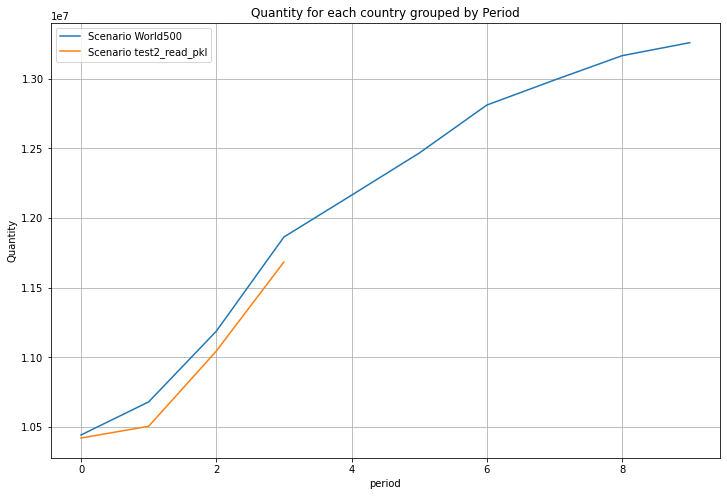

In [4]:
#data = import_pkl.julias_data()
data = data["data_periods"]
sc_plot = sc_plot()
sc_plot.predefined_plot(data)

### Interactive scenario results (quantities)

In [6]:
plot_dropdown_instance = PlotDropDown(data)
plot_dropdown_instance.update_plot_data(region=plot_dropdown_instance.regioncode_dropdown.value,
                                        model=plot_dropdown_instance.model_dropdown.value,
                                        id=plot_dropdown_instance.id_dropdown.value,
                                        domain=plot_dropdown_instance.domain_dropdown.value,
                                        commodity=plot_dropdown_instance.commodity_code_dropdown.value)

interactive(children=(Dropdown(description='Select RegionCode:', options=('Alle', 'a0', 'a1', 'a2', 'a3', 'a4'…

AttributeError: 'PlotDropDown' object has no attribute 'update_plot_data'

### Interactive scenario results (prices)

In [29]:
price_interactive = InteractivePrice(data)




Dropdown(description='Select RegionCode:', options=('Alle', 'a0', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a…

Dropdown(description='Select Model:', options=('Alle', 'GFPMpt', 'GFPM'), value='Alle')

Dropdown(description='Select ID:', options=('Alle', 1, 0), value='Alle')

Dropdown(description='Select Domain:', options=('Alle', 'Demand', 'TransportationExport', 'TransportationImpor…

Dropdown(description='Select CommodityCode:', options=('Alle', 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0,…

Output()

Output()

### Interactive Heatmap

In [7]:
data_selection = data['data_periods']

heatmap_dropdown_instance = HeatmapDropDown(data=data_selection)
heatmap_dropdown_instance.update_heatmap_data(reference_data=heatmap_dropdown_instance.reference_data_dropdown.value,
                                              validation_data=heatmap_dropdown_instance.validation_data_dropdown.value,
                                              comparator=heatmap_dropdown_instance.comparator_dropdown.value,
                                              region=heatmap_dropdown_instance.regioncode_dropdown.value,
                                              commodity=heatmap_dropdown_instance.regioncode_dropdown.value,
                                              domain=heatmap_dropdown_instance.domain_dropdown.value
                                              )

KeyError: 'data_periods'